## Problem 1

The aim of this exercise is to verify, for some specific examples, that i\) **OLS estimators are consistent** and ii\) **asymptotically normal**, and that iii\) **our F statistics follow F distributions in large samples**
without assuming that the error terms u are normally distributed. To do so, we will perform Monte Carlo simulations in Stata.

In the following we assume that the population model is this regression

 $$y=\beta_0+\beta_1x_1+\beta_2x_2+u_i$$

and we also assume that $x$ and $u$ are independent and $x_1 ∼ Uniform(0, 1), x2 ∼ Binomial(1, 0.3)$ and $u + 1 ∼ \chi^2(1)$.

1. Generate a dataset of 1000 observations that contains $x_1 ∼ Uniform(0, 1)$ and $u + 1 ∼ χ2(1)$. Plot both $x_1$ and $u$.

In [1]:
# Generate the two random variables 
using Distributions, Plots, DataFrames
x_1 = rand(1000)
chi_vals = rand(Chisq(1), 1000)
u = chi_vals .- 1

1000-element Vector{Float64}:
 -0.3741459397672052
 -0.7305186344093202
  4.498682324640802
 -0.8528382662717722
 -0.9499302704872337
 -0.07104267567942235
 -0.8858318731182783
 -0.9966578947843354
 -0.9956952515660716
 -0.4970078933271933
  ⋮
  1.7738357849462236
 -0.757679661758979
 -0.25147844828253174
 -0.04316115266033638
 -0.8523377292534466
 -0.8921259090182861
  0.6768248232274754
  0.6514178758026576
 -0.42100230804374816

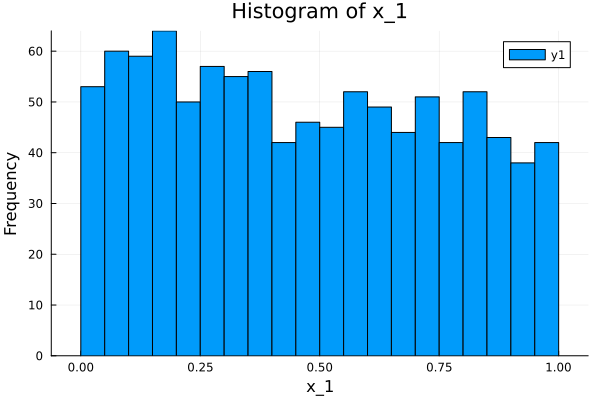

In [2]:
# Plot the histogram of x_1
histogram(x_1, bins=30, title="Histogram of x_1", xlabel="x_1", ylabel="Frequency")

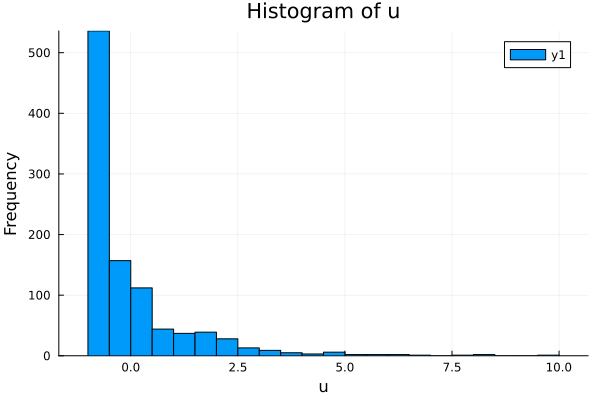

In [3]:
# Plot the histogram of u
histogram(u, bins=30, title="Histogram of u", xlabel="u", ylabel="Frequency")

2. Now that you know how to draw random variables, clear all data and follow these steps:

    (a) Define a program (in Stata) or a function (in other languages) that generates $u + 1 ∼ \chi^2(1)$ over $N = 5$ observations and retrieves the mean and standard deviation of the generated sample

In [4]:
# Define the function to generate the random variables
function f(N)
    u_plus_1= rand(Chisq(1), N)
    u= u_plus_1 .- 1
    return mean(u), std(u)
end

f (generic function with 1 method)

In [5]:
# Run the function with 5 observations
f(5)

(-0.09808384719548327, 1.0563942747653254)

    (b) Simulate the program 10 000 times. you should obtain a dataset with a variable for the mean and one for the standard deviation

In [6]:
# Run the function for 10000 times
n=10000
mean_vals = zeros(n)
sd_vals = zeros(n)
for i in 1:n
    mean_vals[i], sd_vals[i] = f(5)
end

In [7]:
# Generate a new dataframe using the mean and standard deviation values
df = DataFrame(mean_vals = mean_vals, sd_vals = sd_vals)
# Display the first 5 rows of the dataframe to check
first(df, 5)

Row,mean_vals,sd_vals
,Float64,Float64
1,-0.36084,0.477711
2,0.563586,1.87787
3,-0.405872,0.724261
4,-0.472461,0.771012
5,-0.288929,0.893616


(c) Summarize and plot a histogram of the mean variable

In [8]:
# Summarize the mean variable
mean_summary = describe(select(df, [:mean_vals]))

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Float64,Float64,Float64,Int64,DataType
1,mean_vals,0.0131213,-0.990841,-0.117233,3.98133,0,Float64


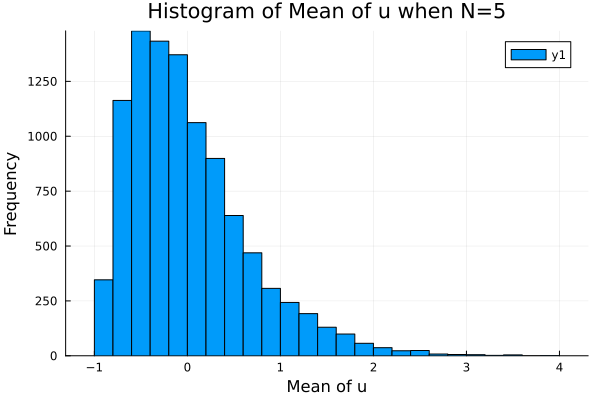

In [9]:
# Plot the histogram of the mean variable
histogram(mean_vals, bins=30, title="Histogram of Mean of u when N=5", xlabel="Mean of u", ylabel="Frequency")

3. Repeat the simulation in 2) but for different programs with $N = 10, 100$ and $ 1000$. Calculate the
summary statistics of each of the mean variables obtained. What do you observe?

In [10]:
# For N=10 
mean_vals = zeros(n)
sd_vals = zeros(n)
for i in 1:n
    mean_vals[i], sd_vals[i] = f(10)
end
df_2 = DataFrame(mean_vals = mean_vals, sd_vals = sd_vals)
mean_summary_2 = describe(select(df_2, [:mean_vals]))

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Float64,Float64,Float64,Int64,DataType
1,mean_vals,0.00293228,-0.928751,-0.0602455,2.8542,0,Float64


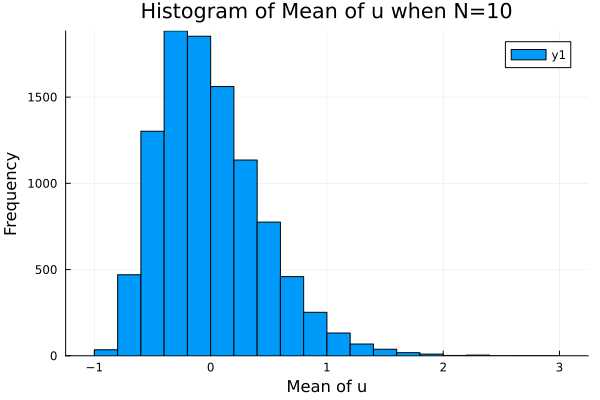

In [11]:
# Plot the histogram of the mean variable
histogram(mean_vals, bins=30, title="Histogram of Mean of u when N=10", xlabel="Mean of u", ylabel="Frequency")

In [12]:
# For N=100
mean_vals = zeros(n)
sd_vals = zeros(n)
for i in 1:n
    mean_vals[i], sd_vals[i] = f(10)
end
df_3 = DataFrame(mean_vals = mean_vals, sd_vals = sd_vals)
mean_summary_3 = describe(select(df_3, [:mean_vals]))

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Float64,Float64,Float64,Int64,DataType
1,mean_vals,-0.000623492,-0.878722,-0.0646038,3.01788,0,Float64


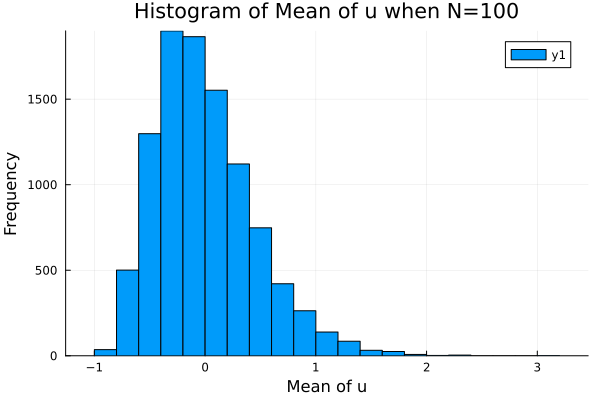

In [13]:
# Plot the histogram of the mean variable
histogram(mean_vals, bins=30, title="Histogram of Mean of u when N=100", xlabel="Mean of u", ylabel="Frequency")

In [14]:
# For N=1000
mean_vals = zeros(n)
sd_vals = zeros(n)
for i in 1:n
    mean_vals[i], sd_vals[i] = f(1000)
end
df_4 = DataFrame(mean_vals = mean_vals, sd_vals = sd_vals)
mean_summary_4 = describe(select(df_4, [:mean_vals]))

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Float64,Float64,Float64,Int64,DataType
1,mean_vals,-0.000206709,-0.152396,-0.0010778,0.192145,0,Float64


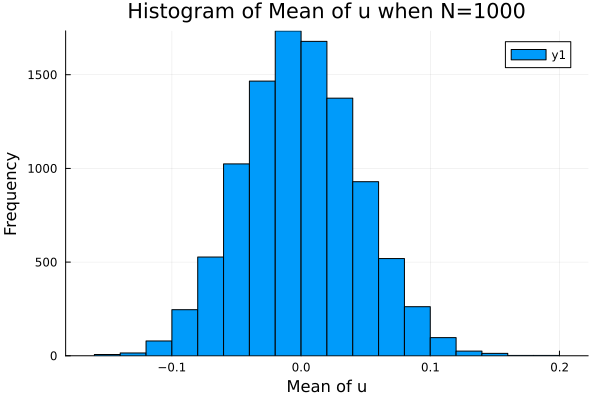

In [15]:
# Plot the histogram of the mean variable
histogram(mean_vals, bins=30, title="Histogram of Mean of u when N=1000", xlabel="Mean of u", ylabel="Frequency")